<a href="https://colab.research.google.com/github/Deltan2002/pytorch/blob/main/foeedforward_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
'''
  MNIST
  dataloader, transformation
  multilaer nn, activation function
  loss and optimizer
  training loop(batches)
  model evaluation

'''

'\n  MNIST\n  dataloader, transformation\n  multilaer nn, activation function\n  loss and optimizer\n  training loop(batches)\n  model evaluation\n\n'

In [18]:
!pip install tensorboard

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import sys
writer = SummaryWriter("runs/mnist")


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [13]:
# hyperparameters

input_size = 784 #28x28 is the size of the image
hidden_size = 100
num_classes = 10 #0-9 digits
num_epochs = 10
batch_size = 100
learning_rate = 0.001


In [5]:
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transforms.ToTensor())


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,  shuffle=False)



examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,  labels.shape)


100%|██████████| 9912422/9912422 [00:00<00:00, 102826693.29it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 11769888.63it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43435526.48it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4352416.90it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([100, 1, 28, 28]) torch.Size([100])


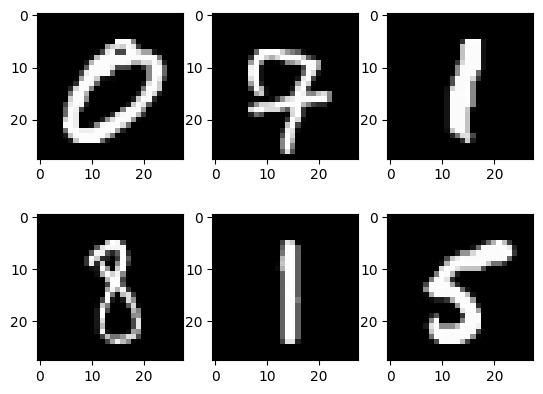

In [6]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
# plt.show()
img_grid = torchvision.utils.make_grid(examples)
writer.add_image('mnist_images',img_grid)
writer.close()
# sys.exit()

In [7]:
# NEAURAL NET

class NeuralNet(nn.Module):
  def __init__(self, input_size,output_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size,output_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out



model = NeuralNet(input_size, hidden_size, num_classes)

In [8]:
# loss and optimzer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)




In [14]:
#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    #100,1,28,28
    #100, 784
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)
    model.to(device)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)


    #backward

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if (i+1)%100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss= {loss.item():.4f}')







epoch 1 / 10, step 100/600, loss= 0.1253
epoch 1 / 10, step 200/600, loss= 0.0465
epoch 1 / 10, step 300/600, loss= 0.0505
epoch 1 / 10, step 400/600, loss= 0.0284
epoch 1 / 10, step 500/600, loss= 0.0403
epoch 1 / 10, step 600/600, loss= 0.1224
epoch 2 / 10, step 100/600, loss= 0.0794
epoch 2 / 10, step 200/600, loss= 0.0491
epoch 2 / 10, step 300/600, loss= 0.1241
epoch 2 / 10, step 400/600, loss= 0.1024
epoch 2 / 10, step 500/600, loss= 0.0476
epoch 2 / 10, step 600/600, loss= 0.1111
epoch 3 / 10, step 100/600, loss= 0.0872
epoch 3 / 10, step 200/600, loss= 0.0490
epoch 3 / 10, step 300/600, loss= 0.1110
epoch 3 / 10, step 400/600, loss= 0.0861
epoch 3 / 10, step 500/600, loss= 0.0431
epoch 3 / 10, step 600/600, loss= 0.0327
epoch 4 / 10, step 100/600, loss= 0.0406
epoch 4 / 10, step 200/600, loss= 0.0813
epoch 4 / 10, step 300/600, loss= 0.1016
epoch 4 / 10, step 400/600, loss= 0.0118
epoch 4 / 10, step 500/600, loss= 0.0887
epoch 4 / 10, step 600/600, loss= 0.0770
epoch 5 / 10, st

In [15]:
#test

with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28).to(device)
    labels = labels.to(device)

    outputs = model(images)

    #value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct +=(predictions==labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print('Accuracy:',acc)

Accuracy: 97.8
